# Importing Packages

In [1]:
import numpy as np
import pandas as pd

# Data collection

In [ ]:
df1=pd.read_csv("C:/Users/Somappa T/Desktop/a/Unemployment in India.csv")
df2=pd.read_csv("C:/Users/Somappa T/Desktop/a/Unemployment_Rate_upto_11_2020.csv")
print(df1.head())
print(df1.tail())

(768, 7)
(267, 9)
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
    Region  Date  Frequency   Estimated Unemployment Rate (%)  

In [3]:
print(df2.head())
print(df2.tail())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

# Data cleaning and preparation

In [59]:
#basic information about data
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployement_rate         740 non-null    float64       
 4   employed                   740 non-null    float64       
 5   Labour_participation_rate  740 non-null    float64       
 6   Area                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


,Date,Unemployement_rate,employed,Labour_participation_rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [13]:
print(df1.shape)
print(df2.shape)
#checking what are the columns in each dataset
print(df1.columns)
print(df2.columns)


(768, 7)
(267, 9)
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [9]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())

27
0


In [ ]:
# Handling Duplicates 

In [60]:
#dataset 1
print(df1.duplicated().sum())
df1[df1.duplicated()]



0


,State,Date,Frequency,Unemployement_rate,employed,Labour_participation_rate,Area


In [62]:
# seems those duplicate rows are empty so we drop them
df1=df1.drop_duplicates()
df1.duplicated()
print(df1.shape)


(740, 7)


In [63]:
# Handling Missing (Null) Values 

In [64]:
df1.isnull().sum()
df1[df1.isnull().any(axis=1)]

,State,Date,Frequency,Unemployement_rate,employed,Labour_participation_rate,Area


In [36]:
#dropping the row with null values
df1=df1.dropna()
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [65]:
#Renaming Columns (for simplicity)

In [66]:
df1.rename( columns={
    'Region' : 'State', 
    ' Date' : 'Date',
    ' Frequency' : 'Frequency',
    ' Estimated Unemployment Rate (%)' : 'Unemployement_rate',
    ' Estimated Employed' : 'employed',
    ' Estimated Labour Participation Rate (%)' : 'Labour_participation_rate',
    'Area' : "Area"
} , inplace=True)
df1.columns

Index(['State', 'Date', 'Frequency', 'Unemployement_rate', 'employed',
       'Labour_participation_rate', 'Area'],
      dtype='object')

In [67]:
# Converting the 'Date' column from a text (string) format to a proper datetime format
# so that pandas can understand and work with.

In [68]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1['Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]

In [69]:
#Extracting month and year from date
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year


# Exploratory Data Analysis


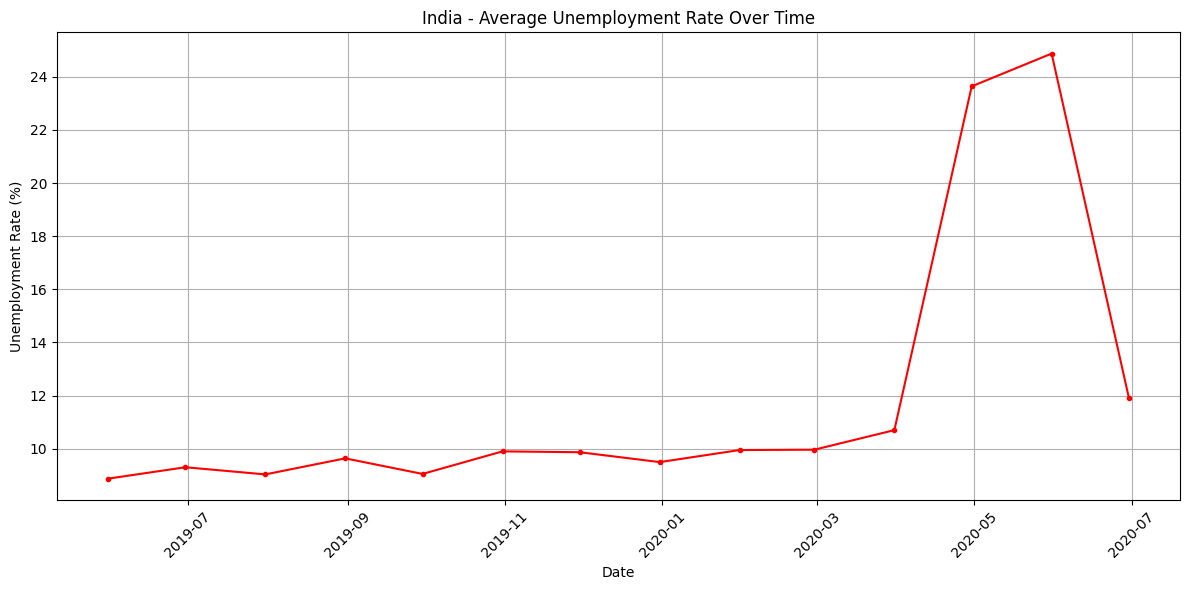

In [86]:
import matplotlib.pyplot as plt

# Group by Date and calculate average unemployment
trend = df1.groupby('Date')['Unemployement_rate'].mean()

# Plotting India - Average Unemployment Rate Over Time
plt.figure(figsize=(12,6))
plt.plot(trend.index, trend.values, marker='.', color='red')
plt.title('India - Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


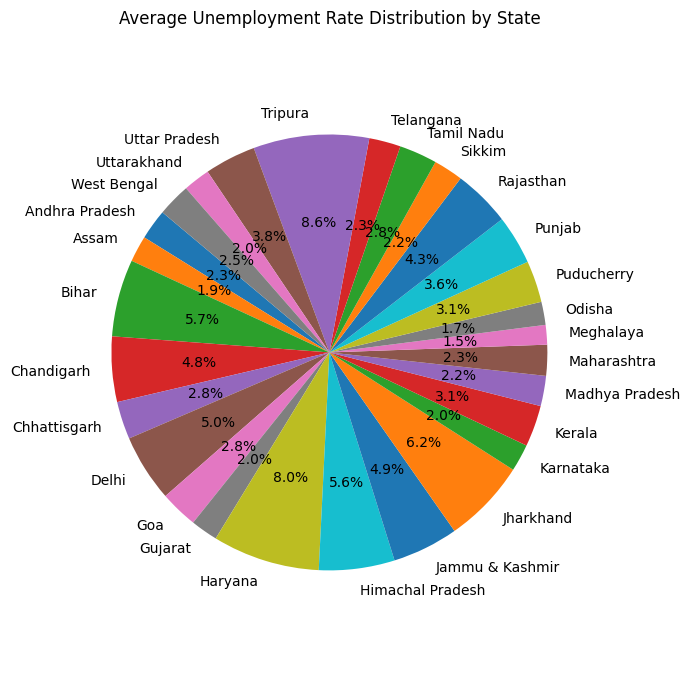

In [91]:
state_avg=df1.groupby('State')['Unemployement_rate'].mean()

plt.figure(figsize=(7, 7))
plt.pie(state_avg, labels=state_avg.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Unemployment Rate Distribution by State')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.tight_layout()
plt.show()


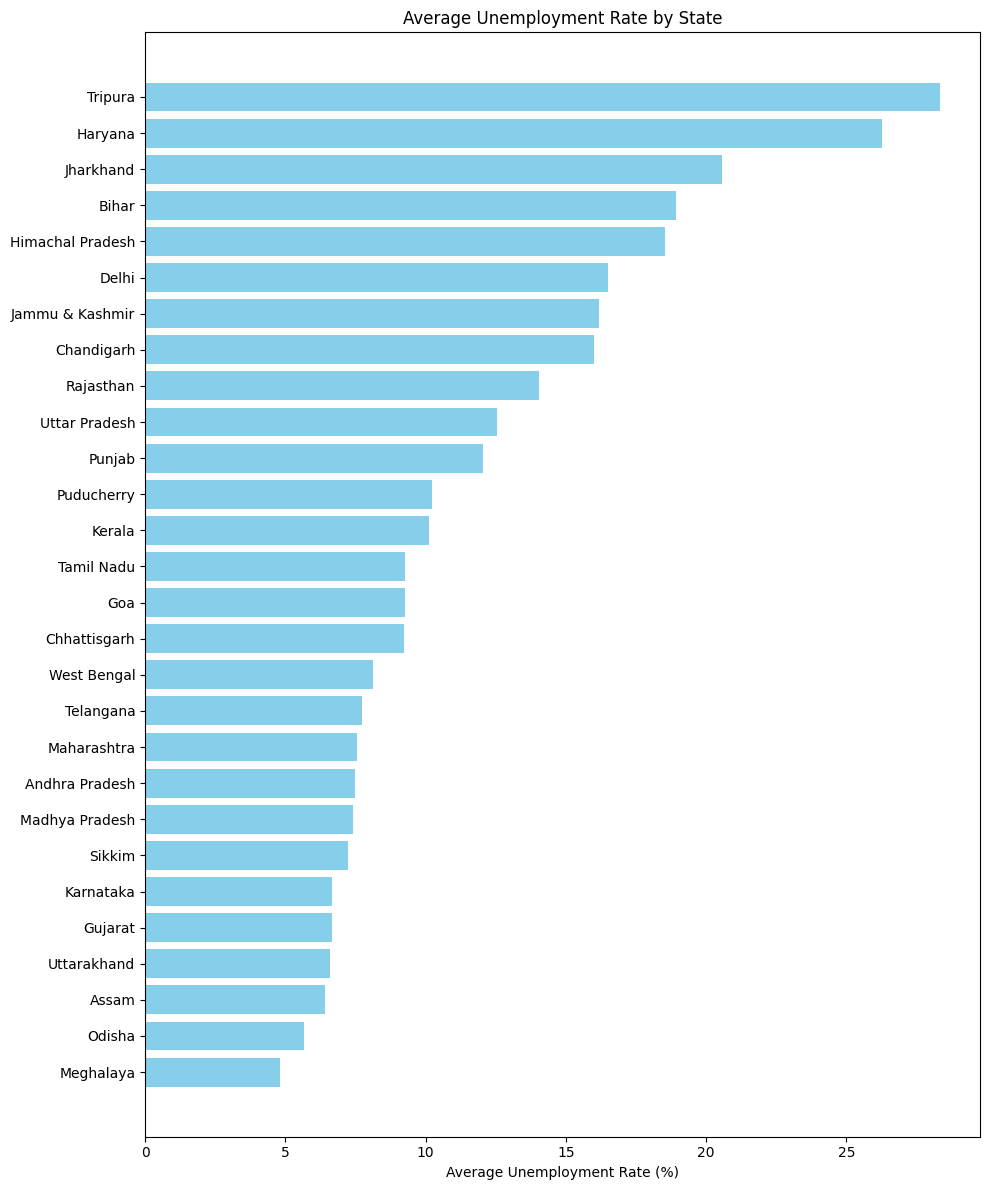

In [85]:
state_avg = df1.groupby('State')['Unemployement_rate'].mean().sort_values()

plt.figure(figsize=(10, 12))
plt.barh(state_avg.index, state_avg.values, color='skyblue')
plt.xlabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()


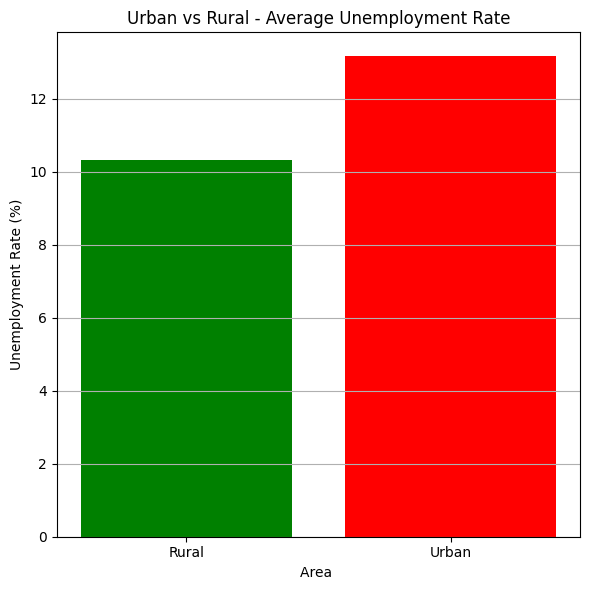

In [88]:
area_avg = df1.groupby('Area')['Unemployement_rate'].mean()


plt.figure(figsize=(6, 6))
plt.bar(area_avg.index, area_avg.values, color=[ 'green','red'])
plt.title('Urban vs Rural - Average Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Area ')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


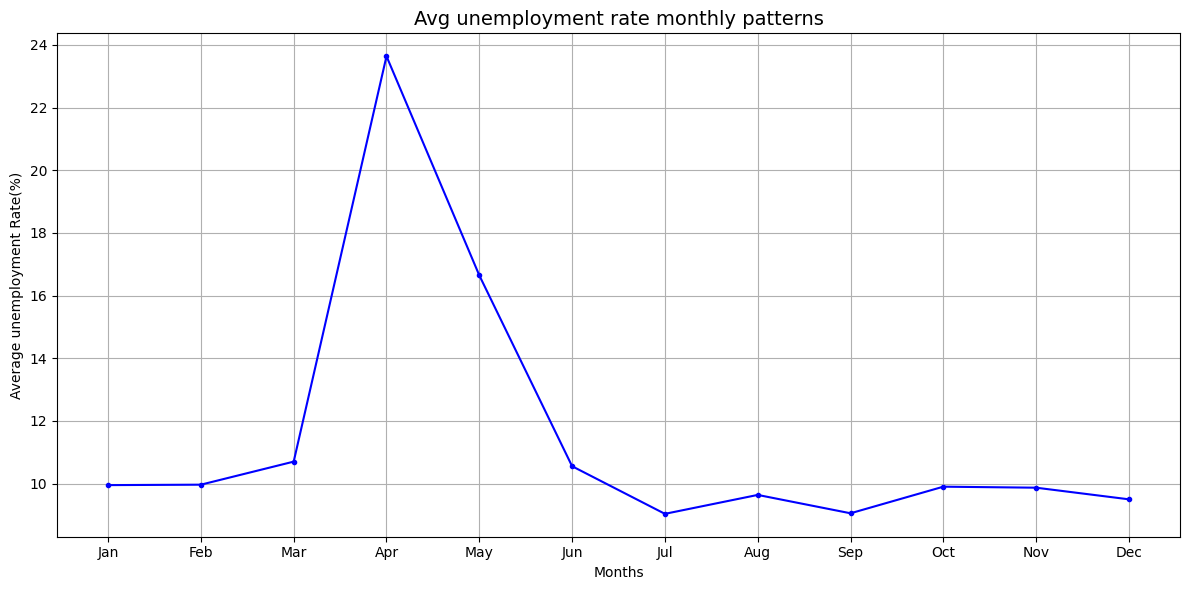

In [105]:
monthly_avg=df1.groupby('Month')['Unemployement_rate'].mean()
plt.figure(figsize=(12,6))
plt.xlabel('Months')
plt.ylabel('Average unemployment Rate(%)')
plt.title('Avg unemployment rate monthly patterns',fontsize=14)
plt.plot(monthly_avg.index,monthly_avg.values,marker='.',color='blue')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.grid(True)
plt.show()